## MultiClass Classification - Machine Learning 

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle

## Uploading dataset

In [3]:
data = pd.read_csv(r"C:\Users\Hi\Downloads\forest_cover_type.csv")

In [4]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


## Understanding the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

In [6]:
data.shape

(145890, 55)

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40
count,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,...,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000,145890.000000
mean,2874.458949,141.127418,11.925574,251.824738,34.554322,3313.827541,217.368106,224.874748,139.788203,3044.958105,...,0.002276,0.004730,0.004222,0.000151,0.000699,0.000069,0.000233,0.005504,0.008294,0.005045
std,210.801279,107.719296,6.319326,192.473899,41.215776,1687.779953,21.590298,16.084851,31.311690,1761.882341,...,0.047650,0.068609,0.064843,0.012279,0.026432,0.008279,0.015264,0.073986,0.090693,0.070848
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2747.000000,54.000000,7.000000,95.000000,7.000000,1848.000000,207.000000,216.000000,121.000000,1608.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2909.000000,108.000000,11.000000,212.000000,23.000000,3420.000000,222.000000,226.000000,140.000000,2713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3004.000000,217.000000,15.000000,362.000000,51.000000,4673.000000,232.000000,236.000000,159.000000,4478.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,61.000000,1343.000000,554.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


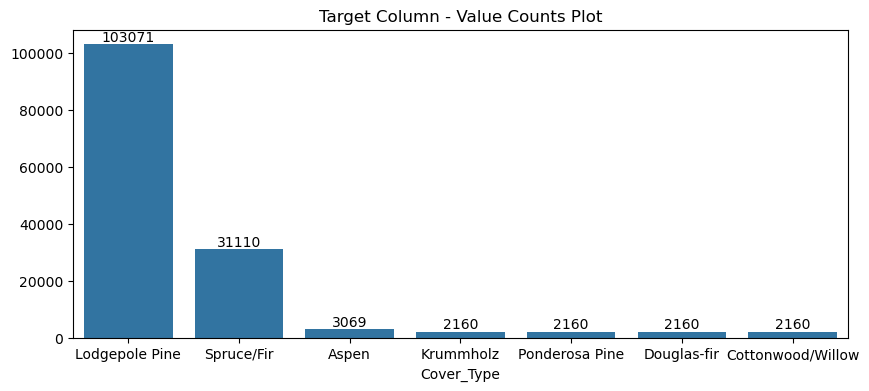

In [10]:
plt.figure(figsize=(10,4))
plt.title("Target Column - Value Counts Plot")
Target_with_valuecounts = sns.barplot(x=data['Cover_Type'].value_counts().index,
                 y=data['Cover_Type'].value_counts().values)
Target_with_valuecounts.bar_label(Target_with_valuecounts.containers[0])
plt.show()

In [11]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_col = data.select_dtypes(include=['object', 'category']).columns.tolist()

## Outlier Detect and Handling

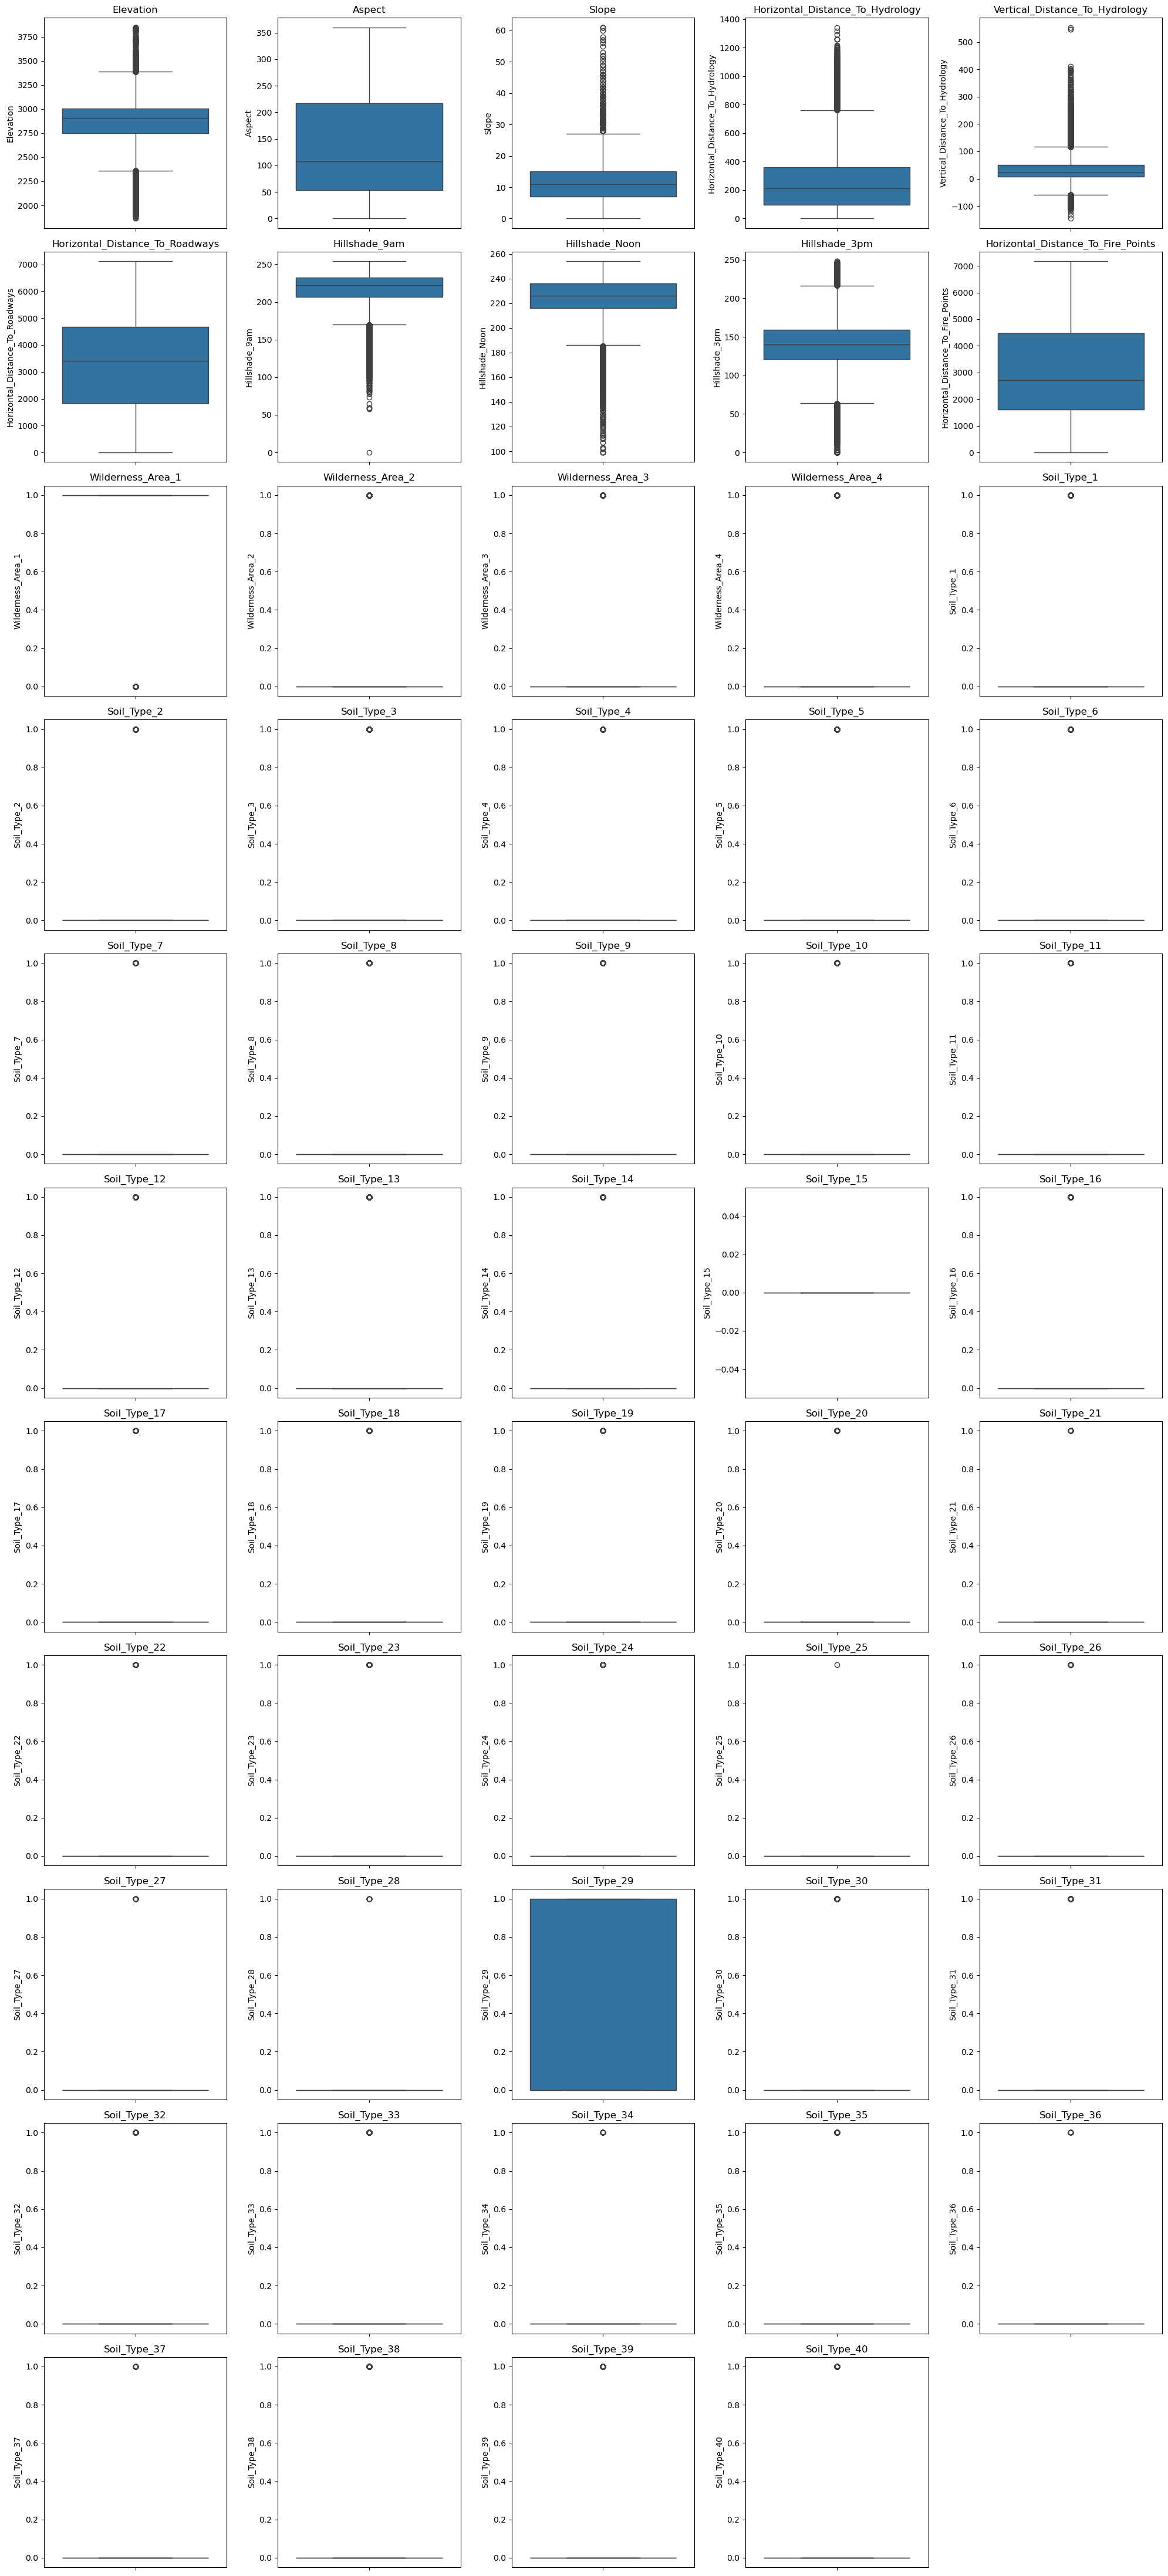

In [12]:
num_cols = len(numeric_cols)
cols_per_row = 5
rows = (num_cols + cols_per_row - 1) // cols_per_row
plt.figure(figsize=(20, 4 * rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

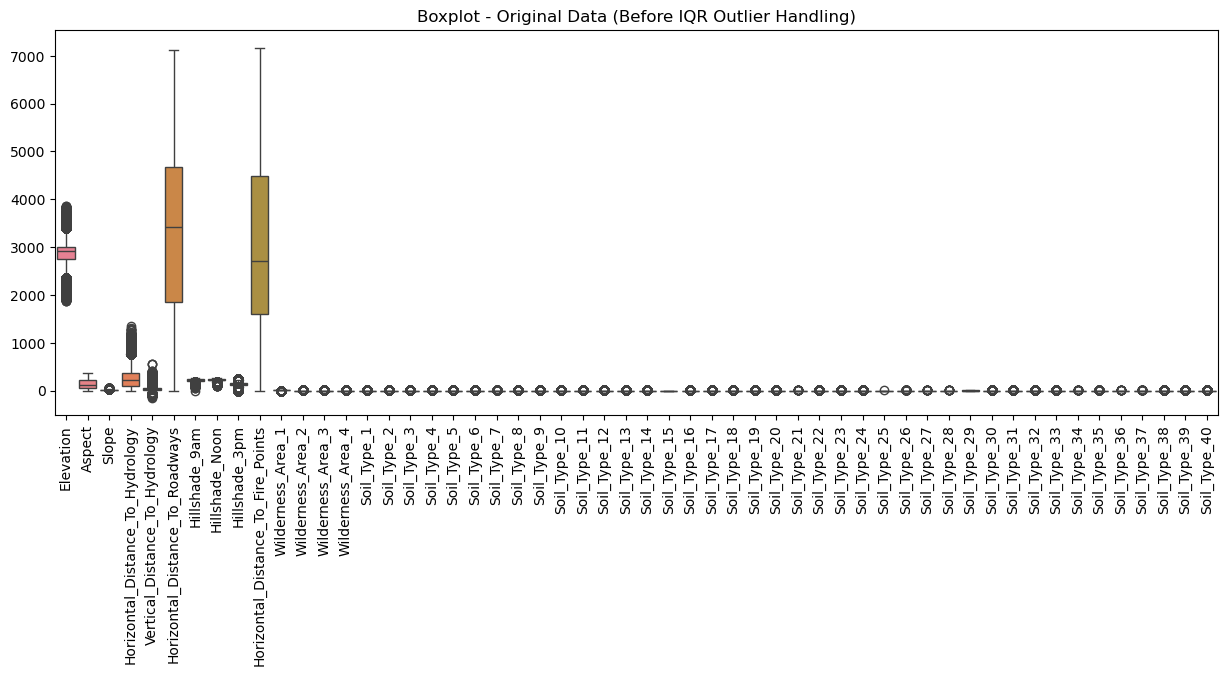

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data[numeric_cols])
plt.title("Boxplot - Original Data (Before IQR Outlier Handling)")
plt.xticks(rotation=90)
plt.show()

In [14]:
data_iqr = data.copy()

for col in numeric_cols:
    Q1 = data_iqr[col].quantile(0.25)
    Q3 = data_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data_iqr[col] = data_iqr[col].clip(lower, upper)

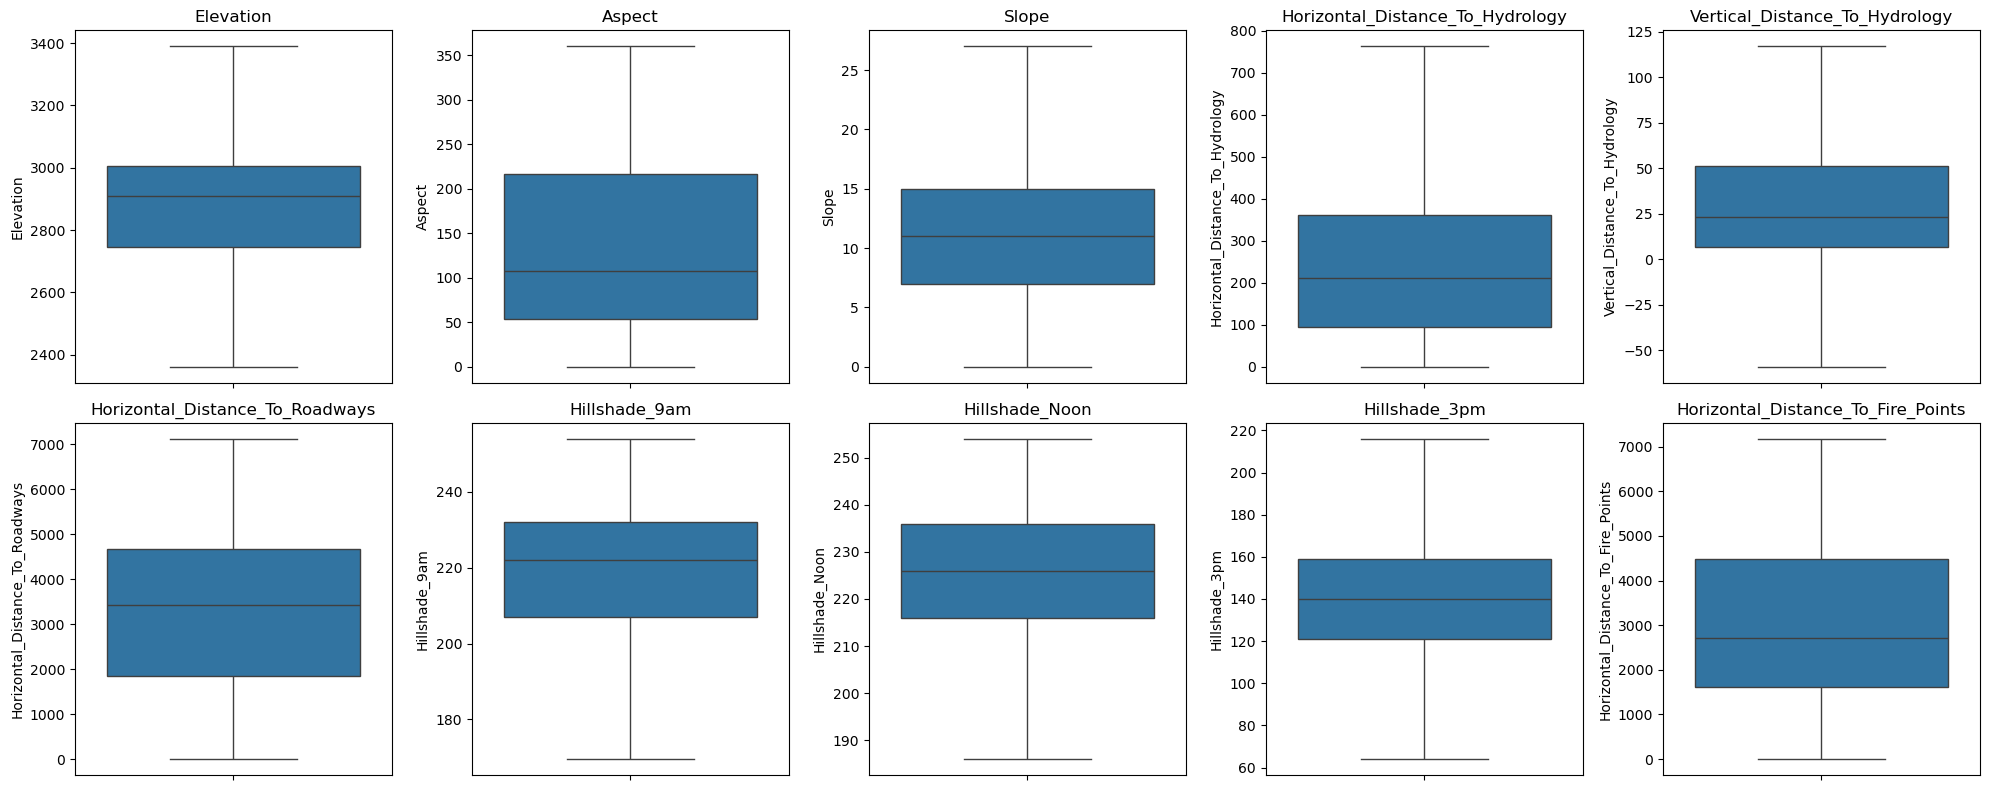

In [15]:
after_iqr_boxplot=data_iqr.select_dtypes(include=['int64', 'float64']).columns[:10]
num_cols = len(after_iqr_boxplot)
cols_per_row = 5
rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(20, 4 * rows))

for i, col in enumerate(after_iqr_boxplot, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=data_iqr[col])
    plt.title(col)

plt.tight_layout()
plt.show()

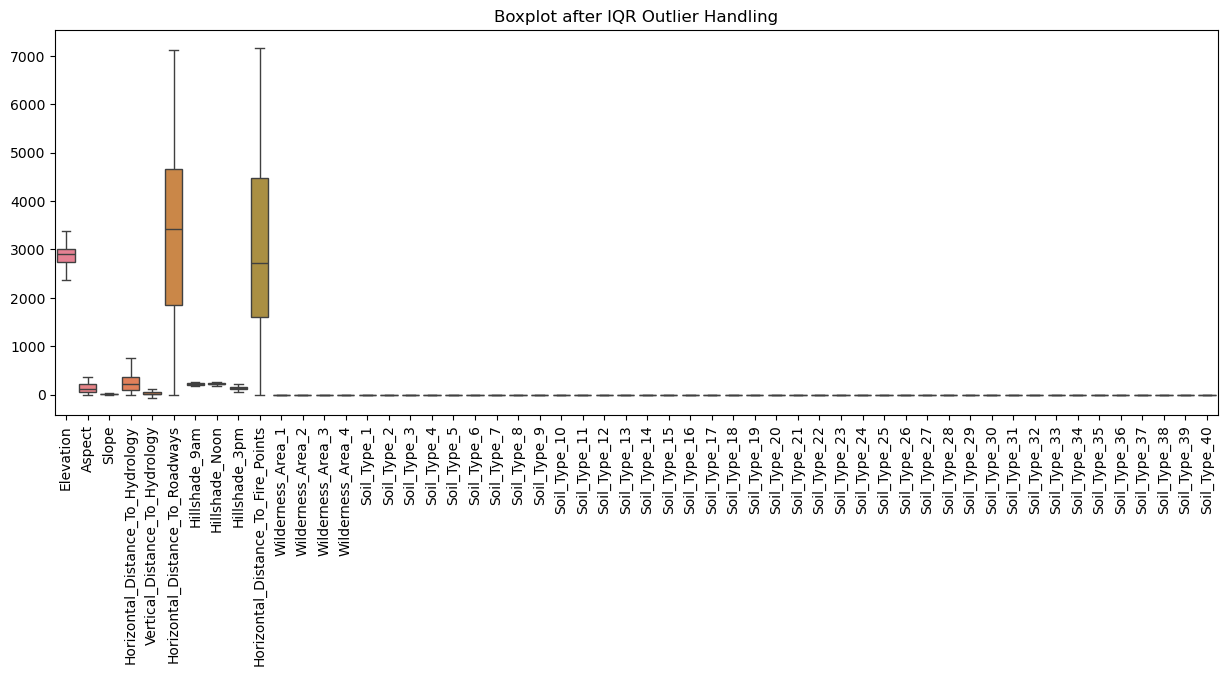

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data_iqr[numeric_cols])
plt.title("Boxplot after IQR Outlier Handling")
plt.xticks(rotation=90)
plt.show()

## EDA

<Figure size 2000x1000 with 0 Axes>

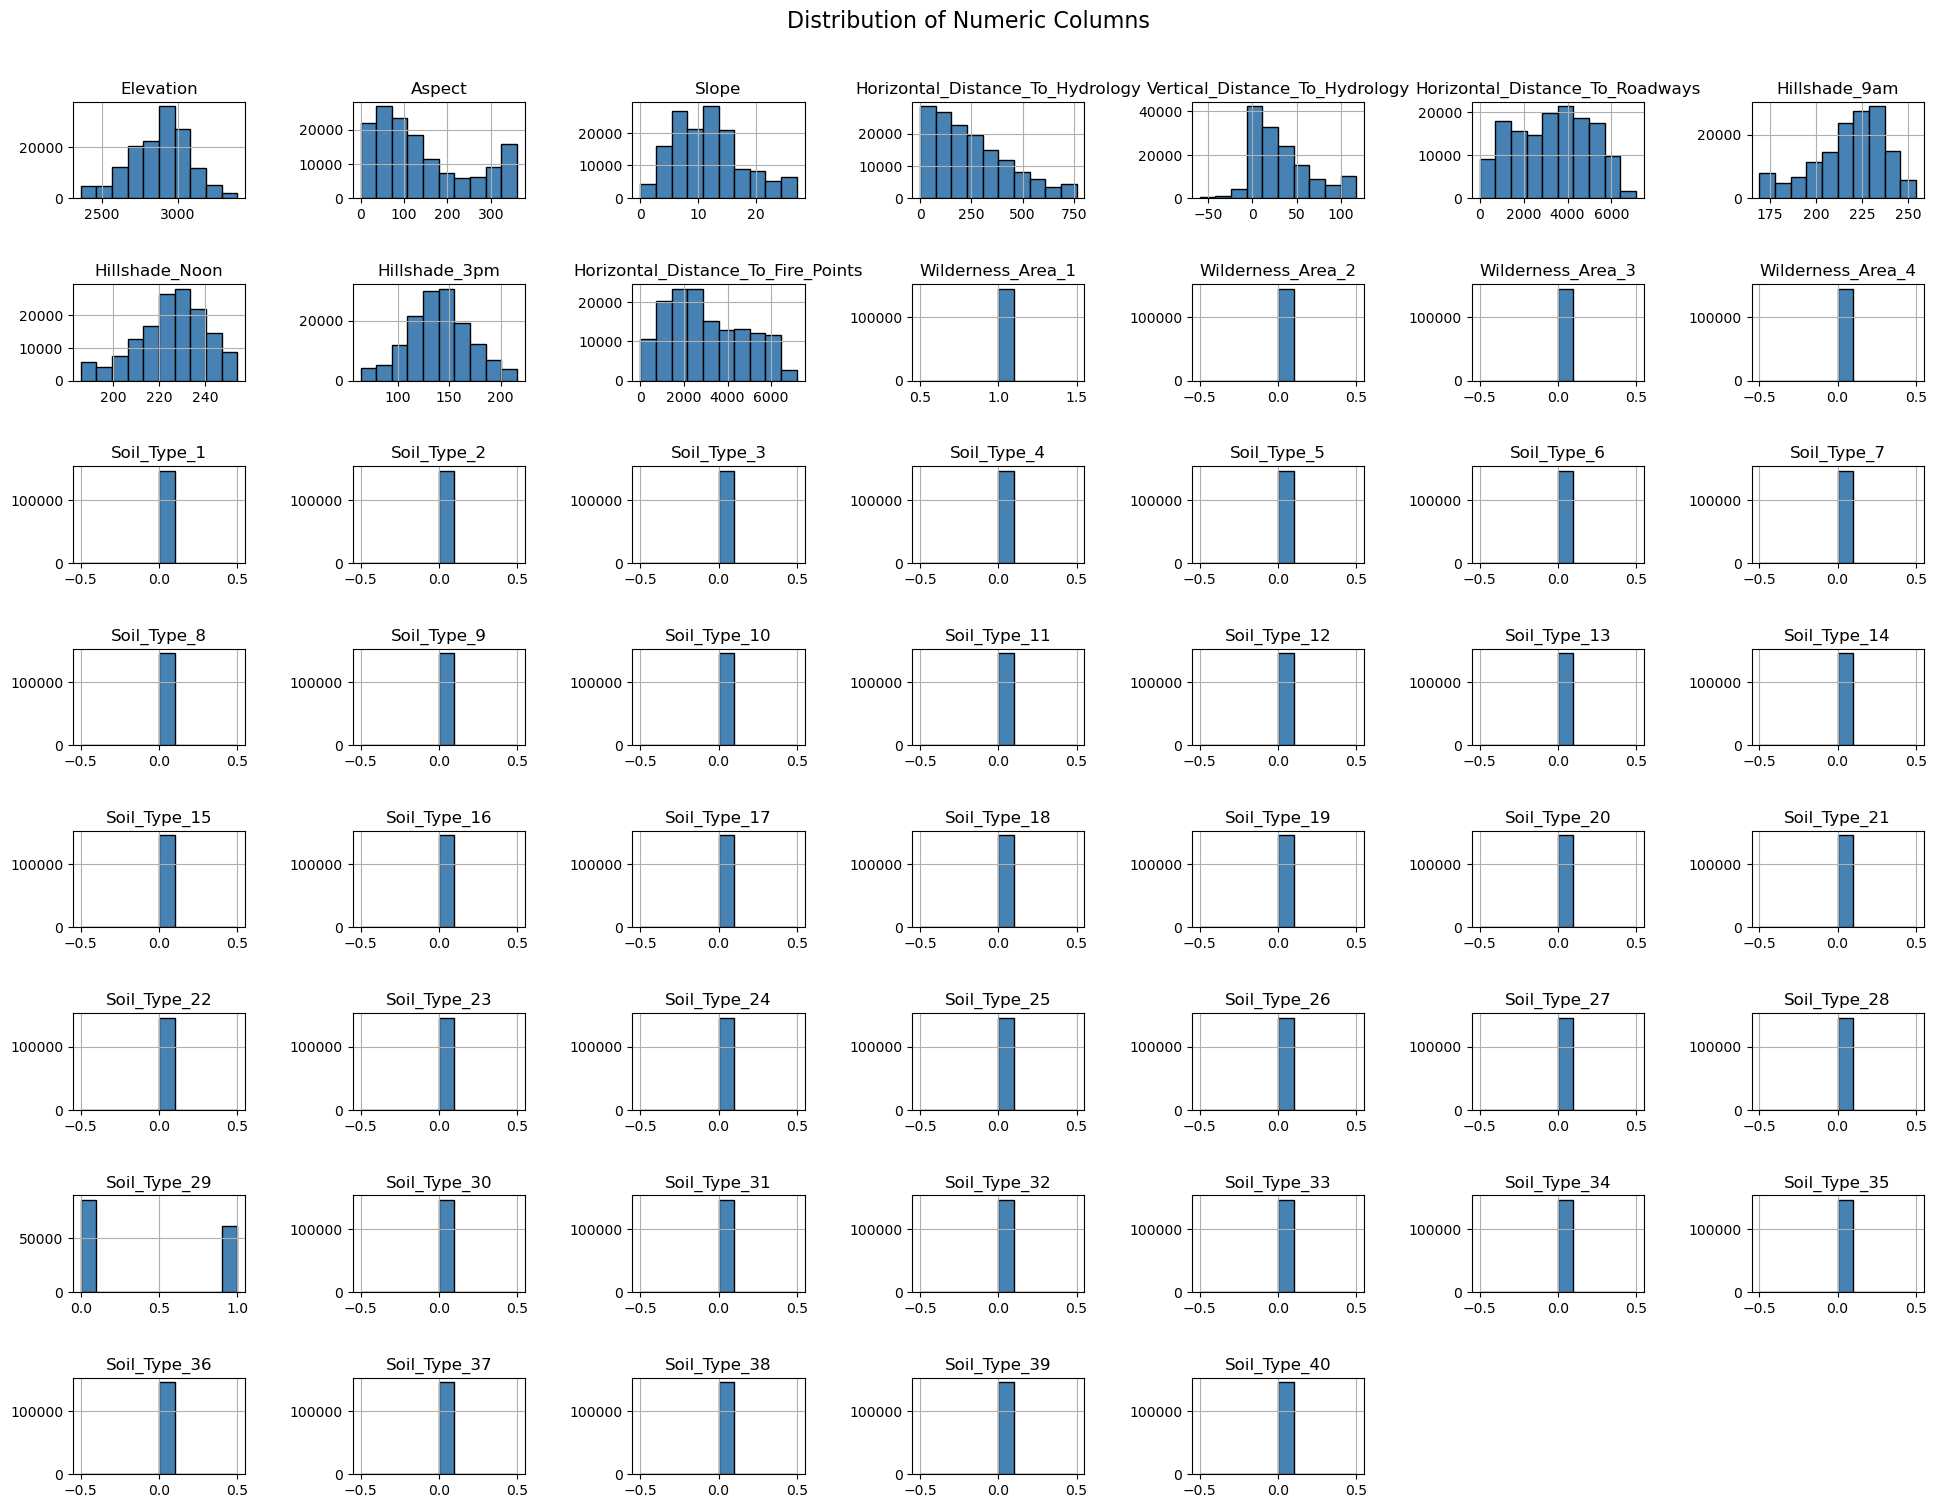

In [17]:
plt.figure(figsize=(20,10))
axes= data_iqr[numeric_cols].hist(bins=10, figsize=(20,15), edgecolor='black', color='steelblue')
plt.tight_layout(pad=3.0)
plt.suptitle("Distribution of Numeric Columns", fontsize=16, y=1.02)
plt.show()

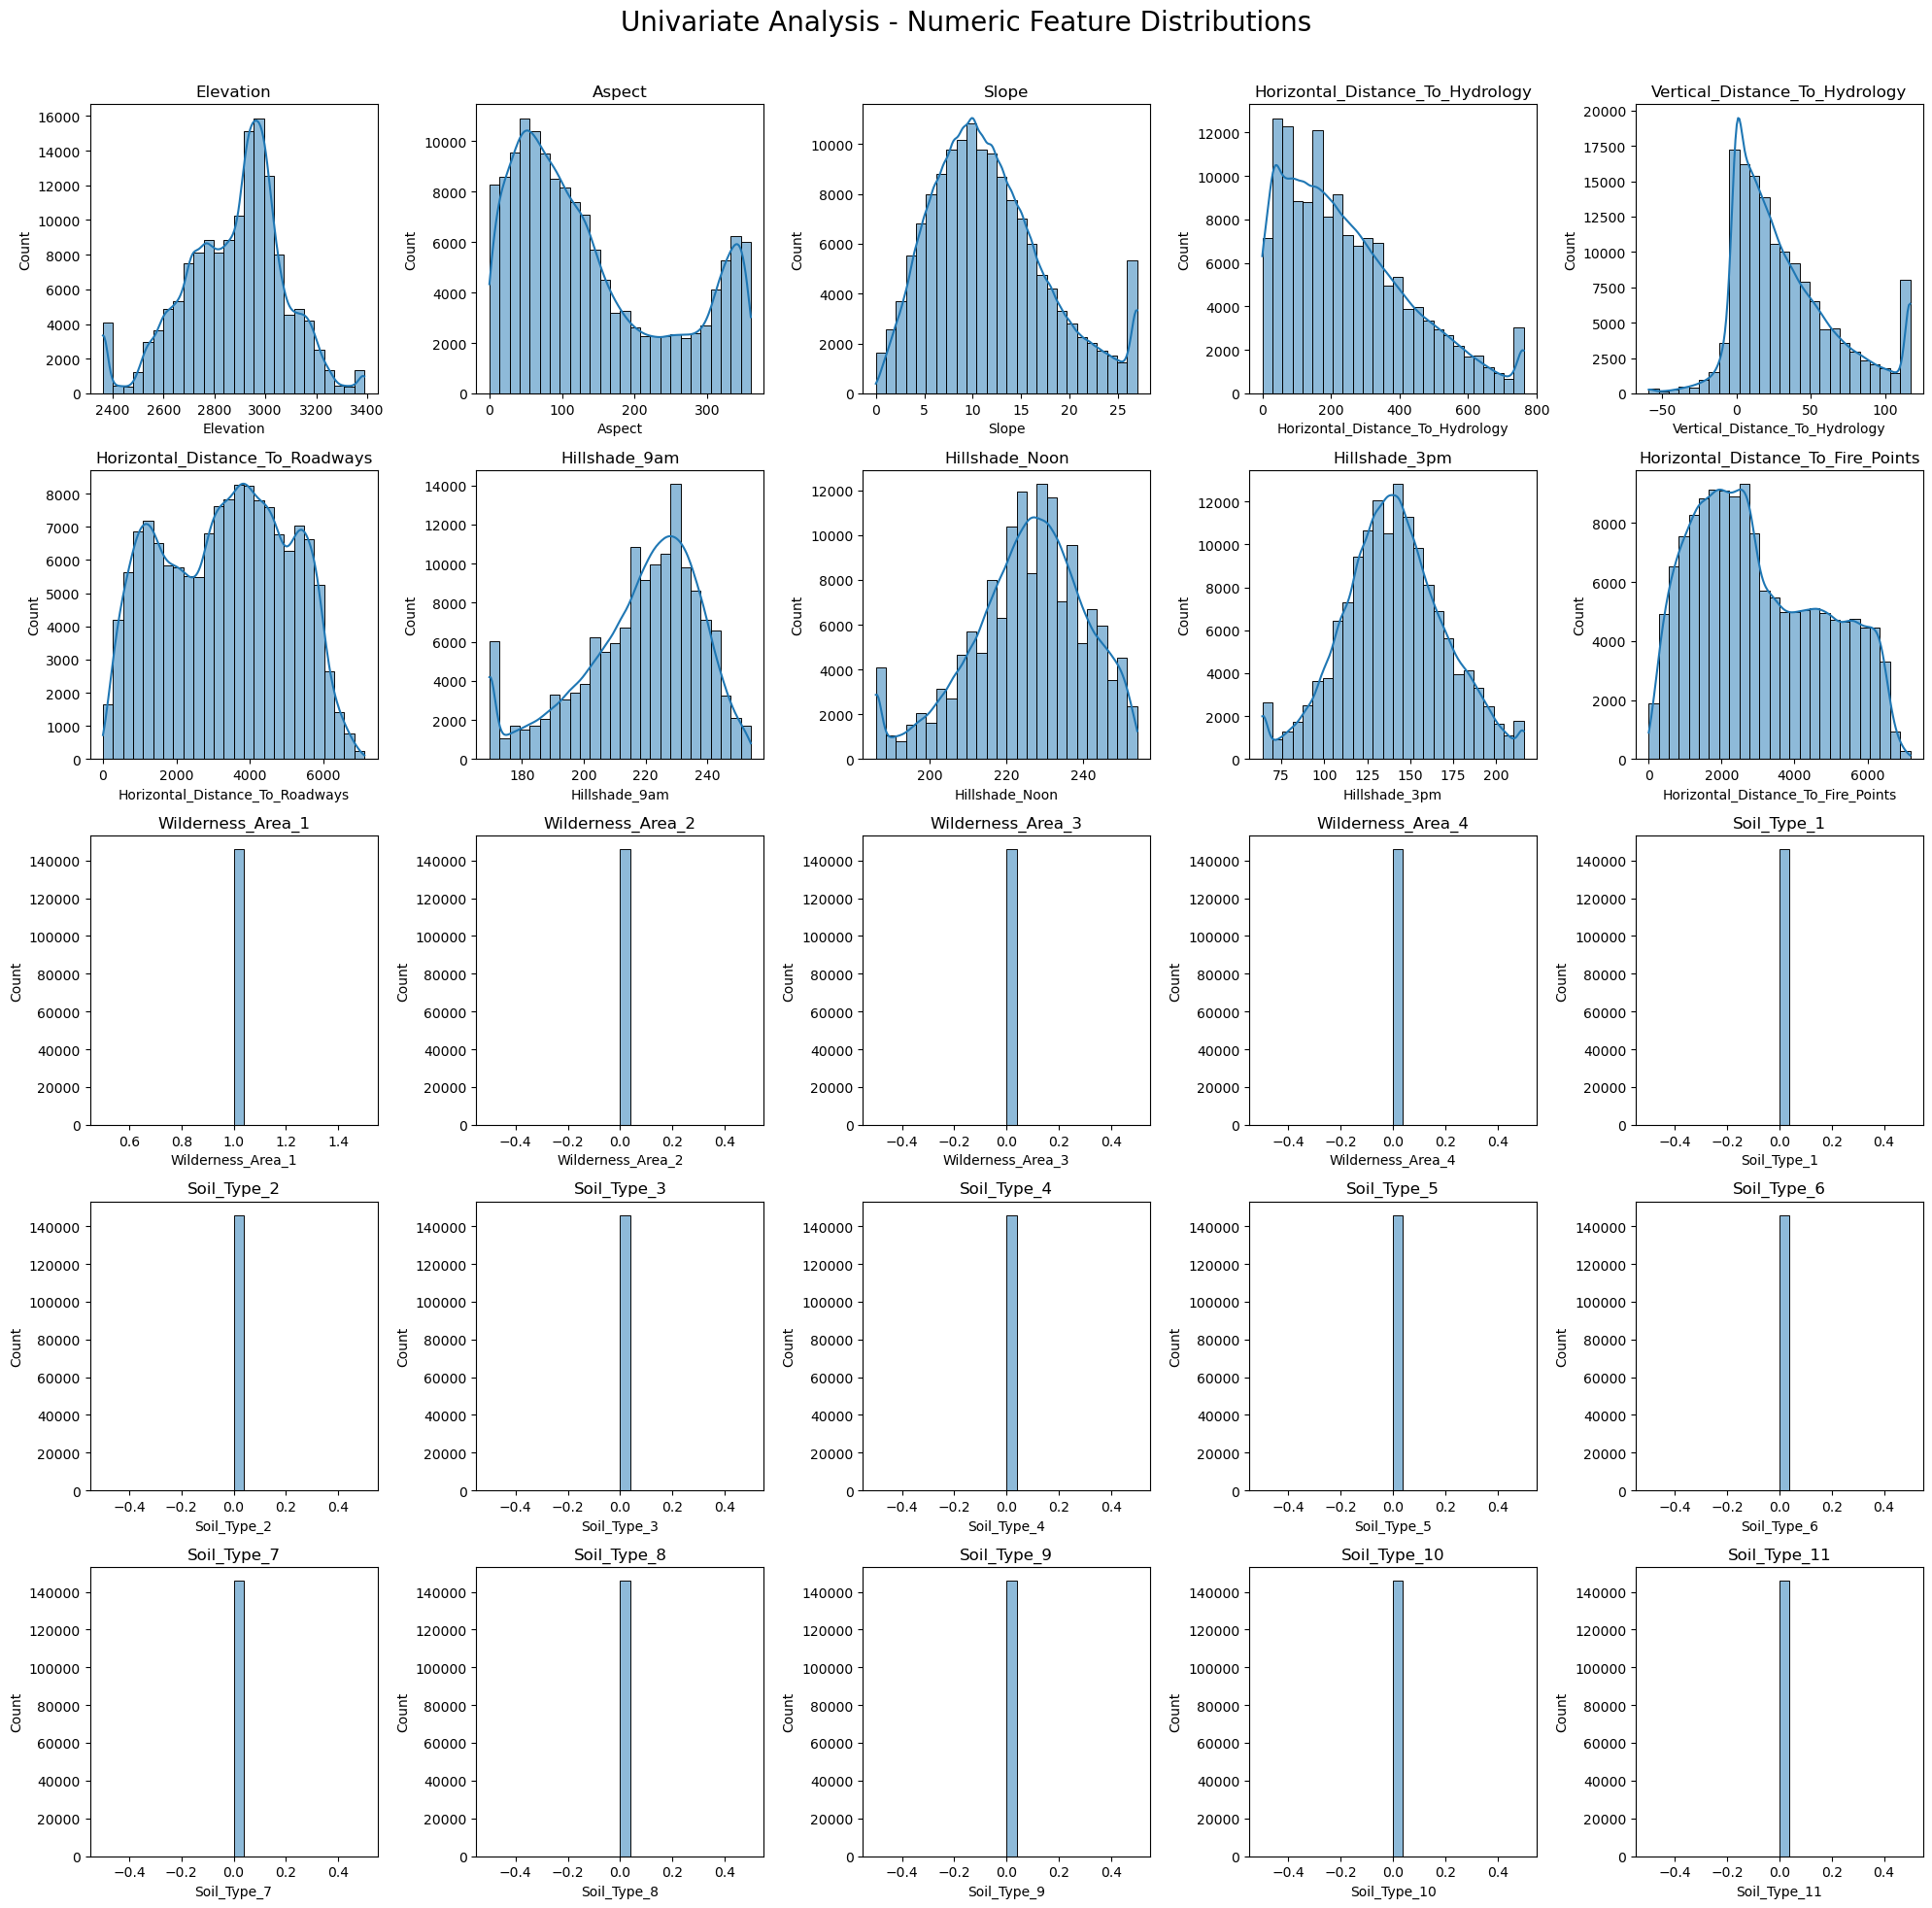

In [18]:
plt.figure(figsize=(20, 20))
plt.suptitle("Univariate Analysis - Numeric Feature Distributions", fontsize=20)

for i, col in enumerate(numeric_cols[:25], 1): 
    plt.subplot(5, 5, i)
    sns.histplot(data_iqr[col], kde=True, bins=26)
    plt.title(col)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

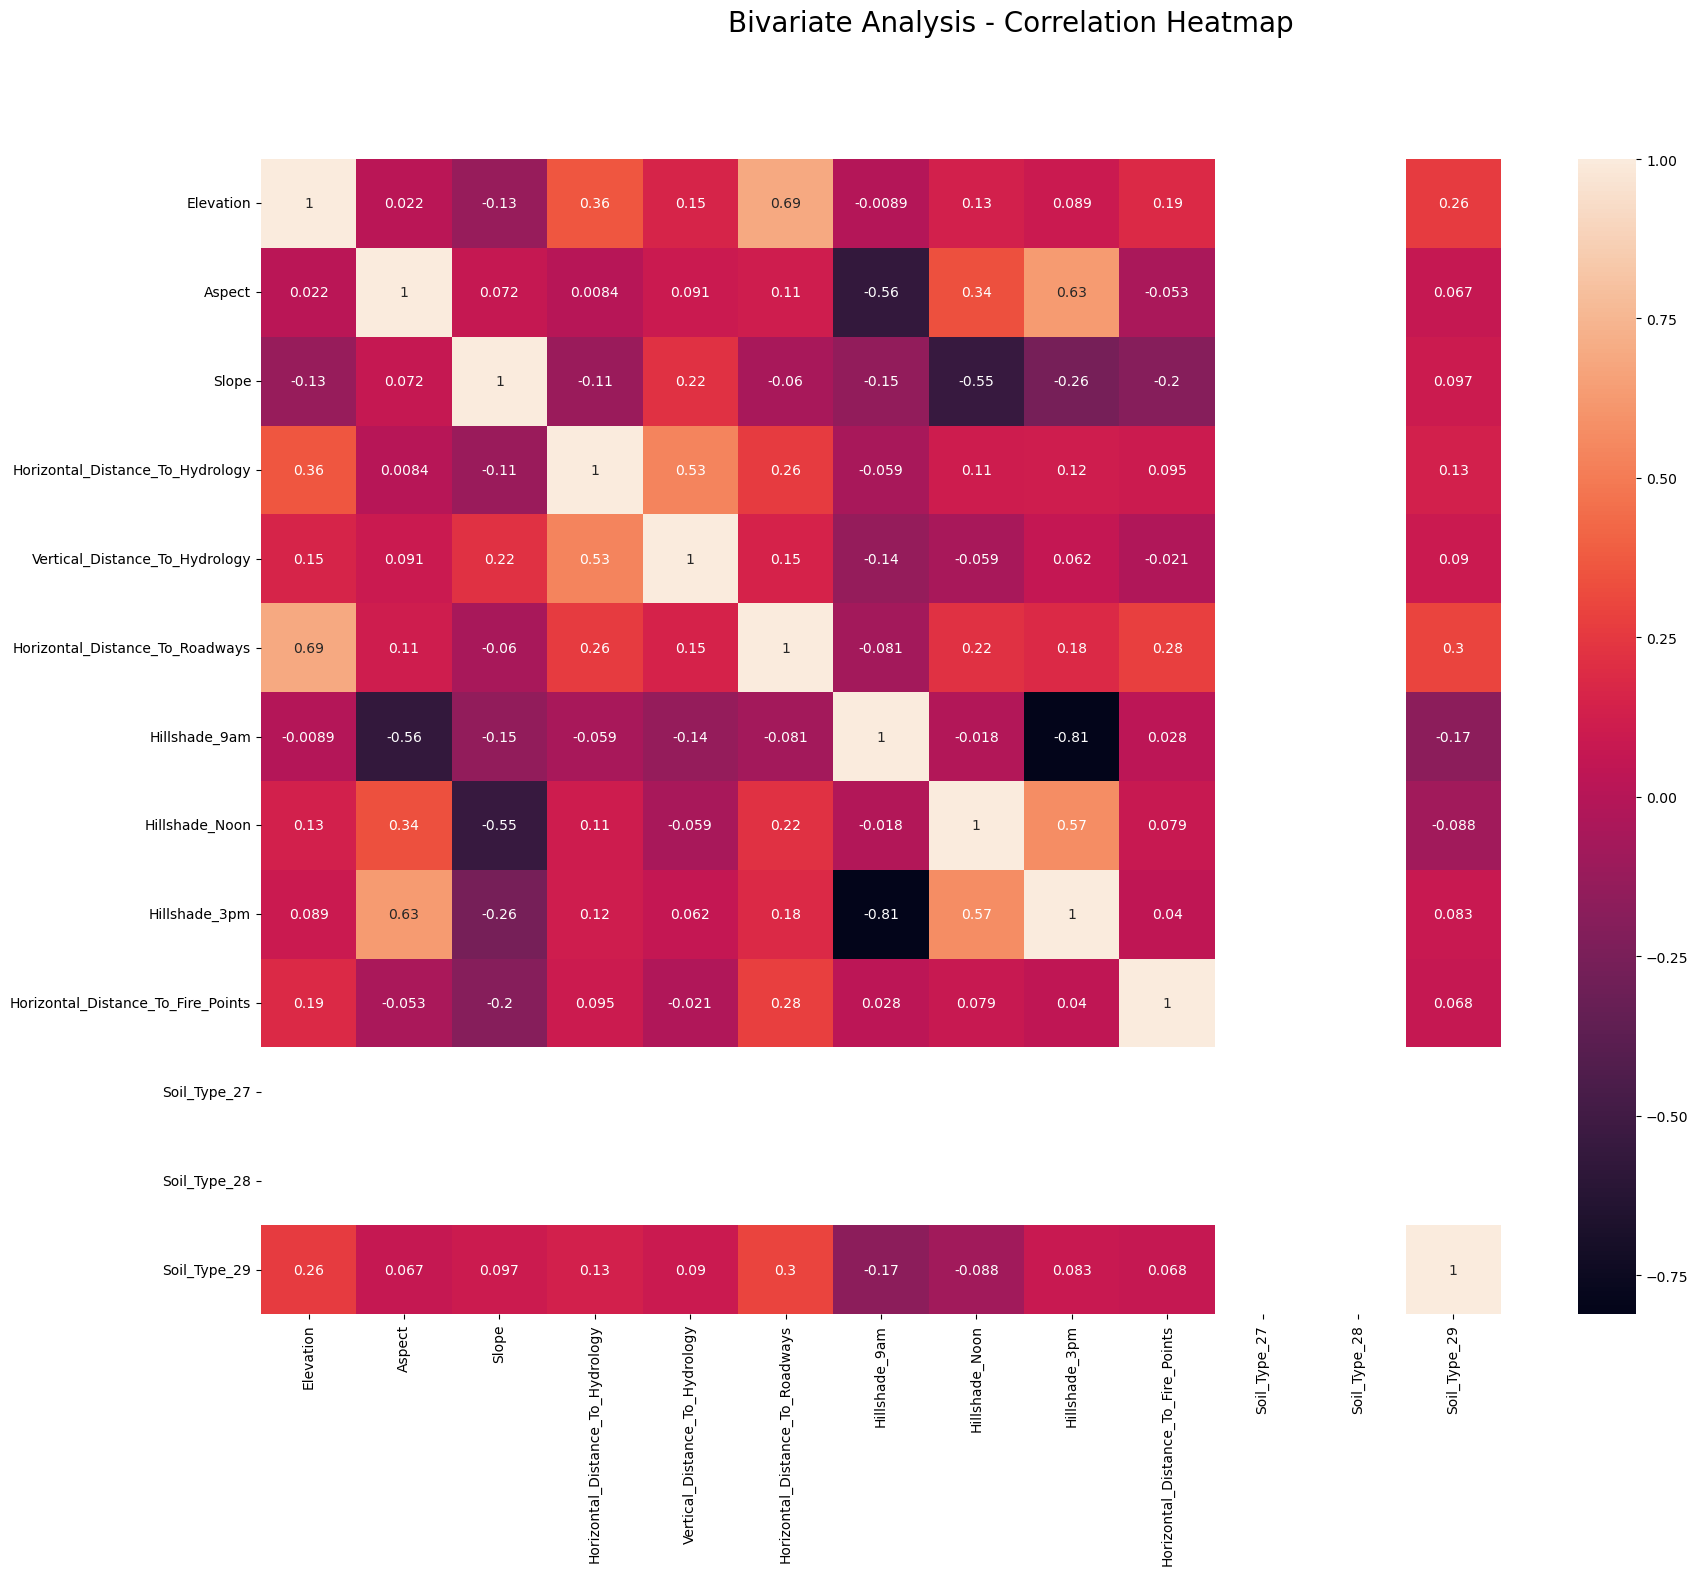

In [19]:
selected_cols = list(numeric_cols[:10]) + list(numeric_cols[40:43])
plt.figure(figsize=(20,15))
plt.suptitle("Bivariate Analysis - Correlation Heatmap", fontsize=20)
sns.heatmap(data_iqr[selected_cols].corr(),annot=True)
plt.show()

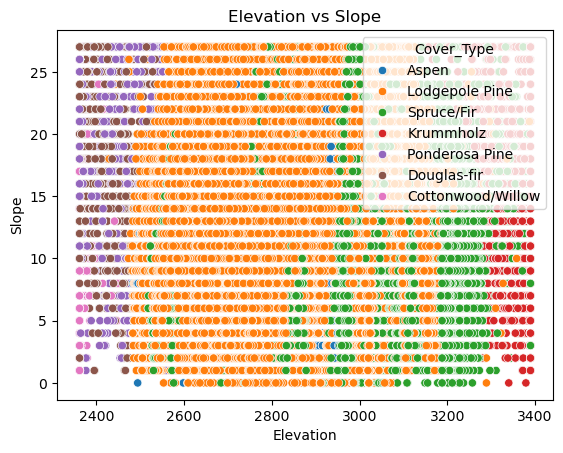

In [20]:
sns.scatterplot(x='Elevation', y='Slope', hue='Cover_Type', data=data_iqr)
plt.title("Elevation vs Slope")
plt.show()

## Feature Engineering

In [21]:
data_iqr['dist_water_road_ratio'] = data_iqr['Horizontal_Distance_To_Hydrology'] / (data_iqr['Horizontal_Distance_To_Roadways'] + 1)
data_iqr['dist_water_fire_ratio'] = data_iqr['Horizontal_Distance_To_Hydrology'] / (data_iqr['Horizontal_Distance_To_Fire_Points'] + 1)

In [22]:
data_iqr['hillshade_diff_morning_noon'] = data_iqr['Hillshade_9am'] - data_iqr['Hillshade_Noon']
data_iqr['hillshade_diff_noon_afternoon'] = data_iqr['Hillshade_Noon'] - data_iqr['Hillshade_3pm']

In [23]:
data_iqr['elevation_slope_interaction'] = data_iqr['Elevation'] * data_iqr['Slope']

In [24]:
data_iqr.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,dist_water_road_ratio,dist_water_fire_ratio,hillshade_diff_morning_noon,hillshade_diff_noon_afternoon,elevation_slope_interaction
0,2596.0,51,3,258.0,0,510,221.0,232,148,6279,...,0.0,0.0,0.0,0.0,Aspen,0.504892,0.041083,-11.0,84,7788.0
1,2590.0,56,2,212.0,-6,390,220.0,235,151,6225,...,0.0,0.0,0.0,0.0,Aspen,0.542199,0.034051,-15.0,84,5180.0
2,2804.0,139,9,268.0,65,3180,234.0,238,135,6121,...,0.0,0.0,0.0,0.0,Lodgepole Pine,0.084250,0.043777,-4.0,103,25236.0
3,2785.0,155,18,242.0,117,3090,238.0,238,122,6211,...,0.0,0.0,0.0,0.0,Lodgepole Pine,0.078292,0.038957,0.0,116,50130.0
4,2595.0,45,2,153.0,-1,391,220.0,234,150,6172,...,0.0,0.0,0.0,0.0,Aspen,0.390306,0.024785,-14.0,84,5190.0


## Label Encoding of Target Variable

In [25]:
label_encoder=LabelEncoder()
data_iqr['Cover_Type']=label_encoder.fit_transform(data_iqr['Cover_Type'])

In [26]:
with open("Encoded_Target.pkl", "wb") as f:
    pickle.dump({'data': data_iqr, 'label_encoders': label_encoder}, f)

print("Processed dataset and label encoders saved as 'Encoded_Target.pkl'")

Processed dataset and label encoders saved as 'Encoded_Target.pkl'


In [27]:
Save_as = "Forestcover_cleaneddata.csv"

data_iqr.to_csv(Save_as, index=False)